<a href="https://colab.research.google.com/github/fresh-learner/MutualFund/blob/main/MF_kaggledataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Mutual_Funds_kaggle.csv to Mutual_Funds_kaggle.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Mutual_Funds_kaggle.csv" with length 124559 bytes


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Mutual_Funds_kaggle.csv')
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    789 non-null    object 
 1   min_sip        789 non-null    int64  
 2   min_lumpsum    789 non-null    int64  
 3   expense_ratio  789 non-null    float64
 4   fund_size_cr   789 non-null    int64  
 5   fund_age_yr    789 non-null    int64  
 6   fund_manager   789 non-null    object 
 7   sortino        789 non-null    object 
 8   alpha          789 non-null    object 
 9   sd             789 non-null    object 
 10  beta           789 non-null    object 
 11  sharpe         789 non-null    object 
 12  risk_level     789 non-null    int64  
 13  amc_name       789 non-null    object 
 14  rating         789 non-null    int64  
 15  category       789 non-null    object 
 16  sub_category   789 non-null    object 
 17  returns_1yr    789 non-null    float64
 18  returns_3y

In [ ]:
df.shape

(789, 20)

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
784    False
785    False
786    False
787    False
788    False
Length: 789, dtype: bool

In [ ]:
df.isna().any()

scheme_name      False
min_sip          False
min_lumpsum      False
expense_ratio    False
fund_size_cr     False
fund_age_yr      False
fund_manager     False
sortino          False
alpha            False
sd               False
beta             False
sharpe           False
risk_level       False
amc_name         False
rating           False
category         False
sub_category     False
returns_1yr      False
returns_3yr       True
returns_5yr       True
dtype: bool

**There is no any duplicated value**

**There is some Null value in the column showing return of 3year & 5year**

In [ ]:
# checking null Values
Null_return_3year = df[df.returns_3yr.isnull()]
Null_return_5year = df[df.returns_5yr.isnull()]

In [ ]:
null_col = df.isnull().sum()
null_col = null_col.loc[null_col.values > 0].reset_index()
null_col

,index,0
0,returns_3yr,21
1,returns_5yr,158


In [ ]:
df.columns = df.columns.str.title()

df.columns

Index(['Scheme_Name', 'Min_Sip', 'Min_Lumpsum', 'Expense_Ratio',
       'Fund_Size_Cr', 'Fund_Age_Yr', 'Fund_Manager', 'Sortino', 'Alpha', 'Sd',
       'Beta', 'Sharpe', 'Risk_Level', 'Amc_Name', 'Rating', 'Category',
       'Sub_Category', 'Returns_1Yr', 'Returns_3Yr', 'Returns_5Yr'],
      dtype='object')

In [ ]:
df.Returns_3Yr = df.Returns_3Yr.fillna(0)
df.Returns_5Yr = df.Returns_5Yr.fillna(0)

In [ ]:
null_col = df.isnull().sum()
null_col = null_col.loc[null_col.values > 0].reset_index()
null_col

,index,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    789 non-null    object 
 1   Min_Sip        789 non-null    int64  
 2   Min_Lumpsum    789 non-null    int64  
 3   Expense_Ratio  789 non-null    float64
 4   Fund_Size_Cr   789 non-null    int64  
 5   Fund_Age_Yr    789 non-null    int64  
 6   Fund_Manager   789 non-null    object 
 7   Sortino        789 non-null    object 
 8   Alpha          789 non-null    object 
 9   Sd             789 non-null    object 
 10  Beta           789 non-null    object 
 11  Sharpe         789 non-null    object 
 12  Risk_Level     789 non-null    int64  
 13  Amc_Name       789 non-null    object 
 14  Rating         789 non-null    int64  
 15  Category       789 non-null    object 
 16  Sub_Category   789 non-null    object 
 17  Returns_1Yr    789 non-null    float64
 18  Returns_3Y

In [ ]:
# dropping columns
df = df.drop(columns=['Sortino','Alpha','Sd','Beta','Sharpe'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scheme_Name    789 non-null    object 
 1   Min_Sip        789 non-null    int64  
 2   Min_Lumpsum    789 non-null    int64  
 3   Expense_Ratio  789 non-null    float64
 4   Fund_Size_Cr   789 non-null    int64  
 5   Fund_Age_Yr    789 non-null    int64  
 6   Fund_Manager   789 non-null    object 
 7   Risk_Level     789 non-null    int64  
 8   Amc_Name       789 non-null    object 
 9   Rating         789 non-null    int64  
 10  Category       789 non-null    object 
 11  Sub_Category   789 non-null    object 
 12  Returns_1Yr    789 non-null    float64
 13  Returns_3Yr    789 non-null    float64
 14  Returns_5Yr    789 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 92.6+ KB


In [ ]:
df.sample(5)

,Scheme_Name,Min_Sip,Min_Lumpsum,Expense_Ratio,Fund_Size_Cr,Fund_Age_Yr,Fund_Manager,Risk_Level,Amc_Name,Rating,Category,Sub_Category,Returns_1Yr,Returns_3Yr,Returns_5Yr
583,PGIM India Money Market Fund,1000,5000,0.15,235,3,Puneet Pal,2,PGIM India Mutual Fund,4,Debt,Money Market Funds,5.7,5.1,0.0
701,Tata India Consumer Fund,150,5000,0.91,1346,7,Sonam Udasi,6,Tata Mutual Fund,2,Equity,Sectoral / Thematic Mutual Funds,2.8,23.0,10.6
588,Quant Active Fund,1000,5000,0.58,3531,10,Sanjeev Sharma,6,Quant Mutual Fund,0,Equity,Multi Cap Funds,1.0,45.5,19.9
711,Tata Overnight Fund,1000,5000,0.09,3236,4,Amit Somani,1,Tata Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,0.0
170,DSP Tax Saver Fund,500,500,0.81,10129,10,Rohit Singhania,6,DSP Mutual Fund,4,Equity,ELSS Mutual Funds,1.8,28.8,13.3


In [ ]:
#Average of mimimum sum required
df.Min_Sip.mean()

540.1761723700887

**EDA Analysis**


1.   Checking performace of different fund cateogries [i.e., Equity, Debt, Hybrid] and subcateogries.




In [ ]:
data_type = df.dtypes.value_counts()
data_type

int64      6
object     5
float64    4
dtype: int64

In [ ]:
df.columns

Index(['Scheme_Name', 'Min_Sip', 'Min_Lumpsum', 'Expense_Ratio',
       'Fund_Size_Cr', 'Fund_Age_Yr', 'Fund_Manager', 'Risk_Level', 'Amc_Name',
       'Rating', 'Category', 'Sub_Category', 'Returns_1Yr', 'Returns_3Yr',
       'Returns_5Yr'],
      dtype='object')

<Axes: title={'center': 'Cateogry Analysis'}, xlabel='Category', ylabel='count'>

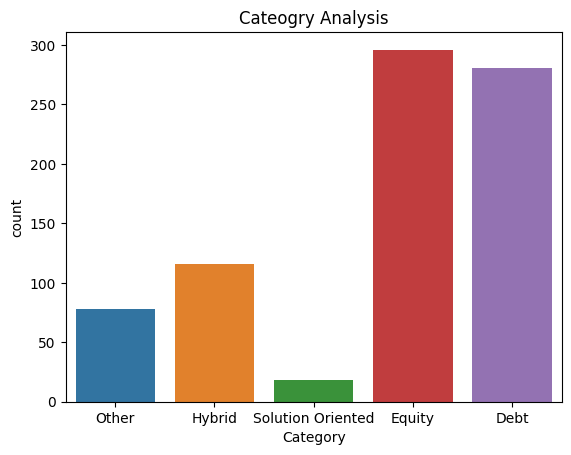

In [ ]:
# cateogry Analysis
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(15,10))
plt.title('Cateogry Analysis')
plt.xlabel('d')
plt.ylabel('d')
sns.countplot(x=df['Category'])

<Axes: title={'center': 'Sub-Category Analysis'}, xlabel='Sub_Category', ylabel='count'>

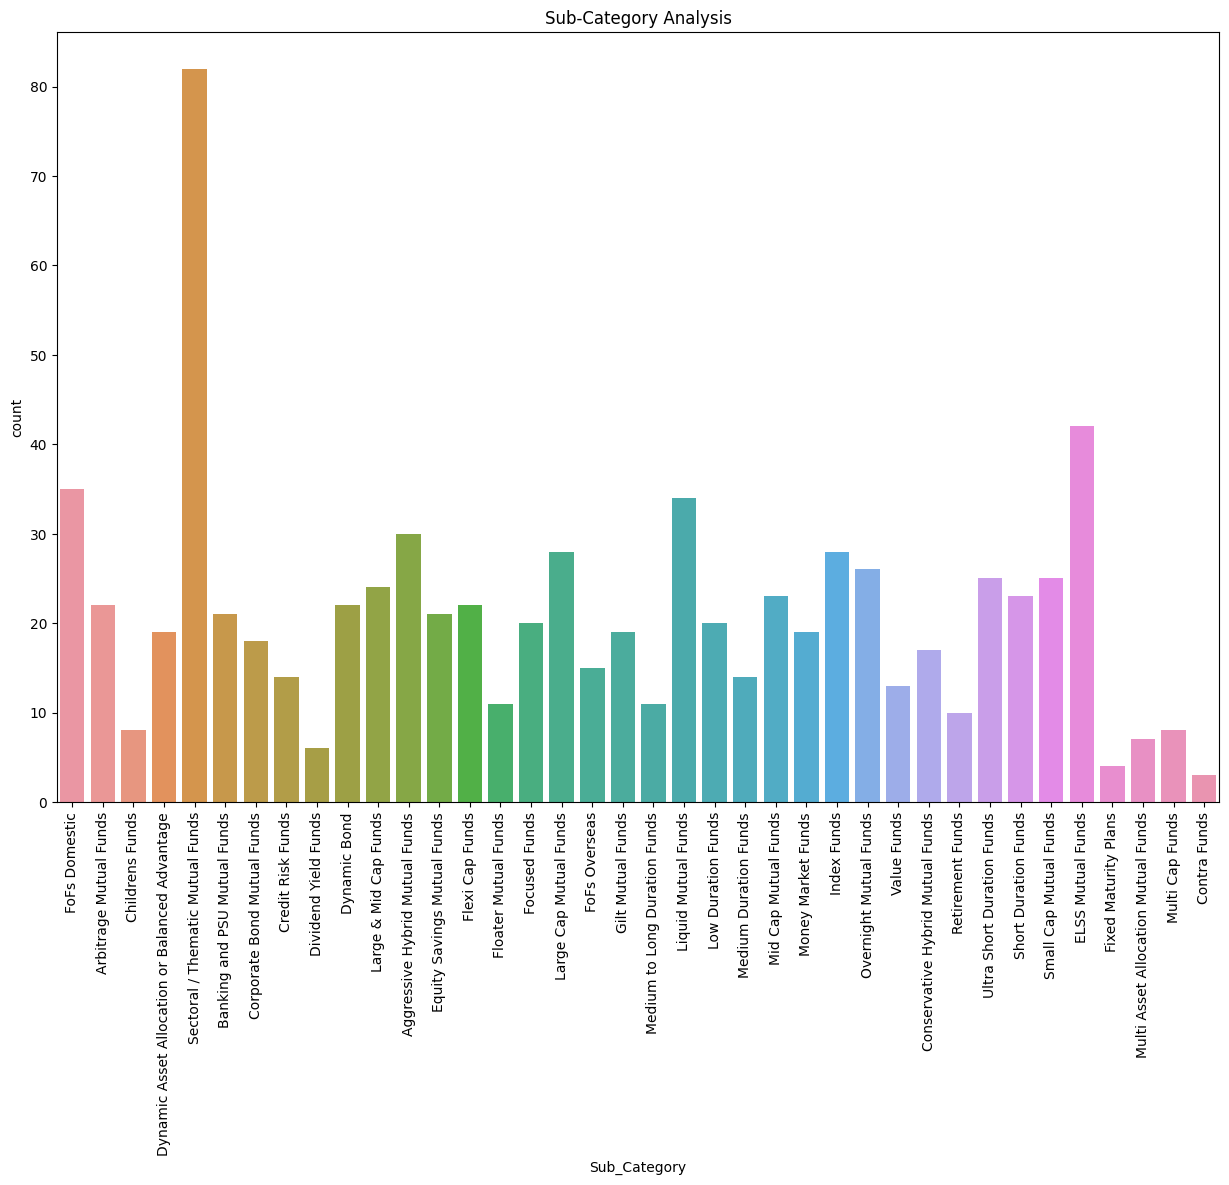

In [ ]:
# subcateogry Analysis
plt.figure(figsize=(15,10))
plt.title('Sub-Category Analysis')
plt.xlabel('d')
plt.ylabel('d')
plt.xticks(rotation=90)
sns.countplot(x=df['Sub_Category'])

In [ ]:
# Fund returns on Category
Year_1 = df.groupby('Category')['Returns_1Yr'].mean()
Year_3 = df.groupby('Category')['Returns_3Yr'].mean()
Year_5 = df.groupby('Category')['Returns_5Yr'].mean()

In [ ]:
Year_1


Category
Debt                 5.555872
Equity               2.895270
Hybrid               4.075000
Other                2.942308
Solution Oriented    1.644444
Name: Returns_1Yr, dtype: float64

In [ ]:
Year_3

Category
Debt                  5.806050
Equity               29.548311
Hybrid               15.272414
Other                20.392308
Solution Oriented    18.444444
Name: Returns_3Yr, dtype: float64

In [ ]:
Year_5

Category
Debt                  4.813167
Equity               10.228716
Hybrid                7.027586
Other                 8.482051
Solution Oriented     5.955556
Name: Returns_5Yr, dtype: float64

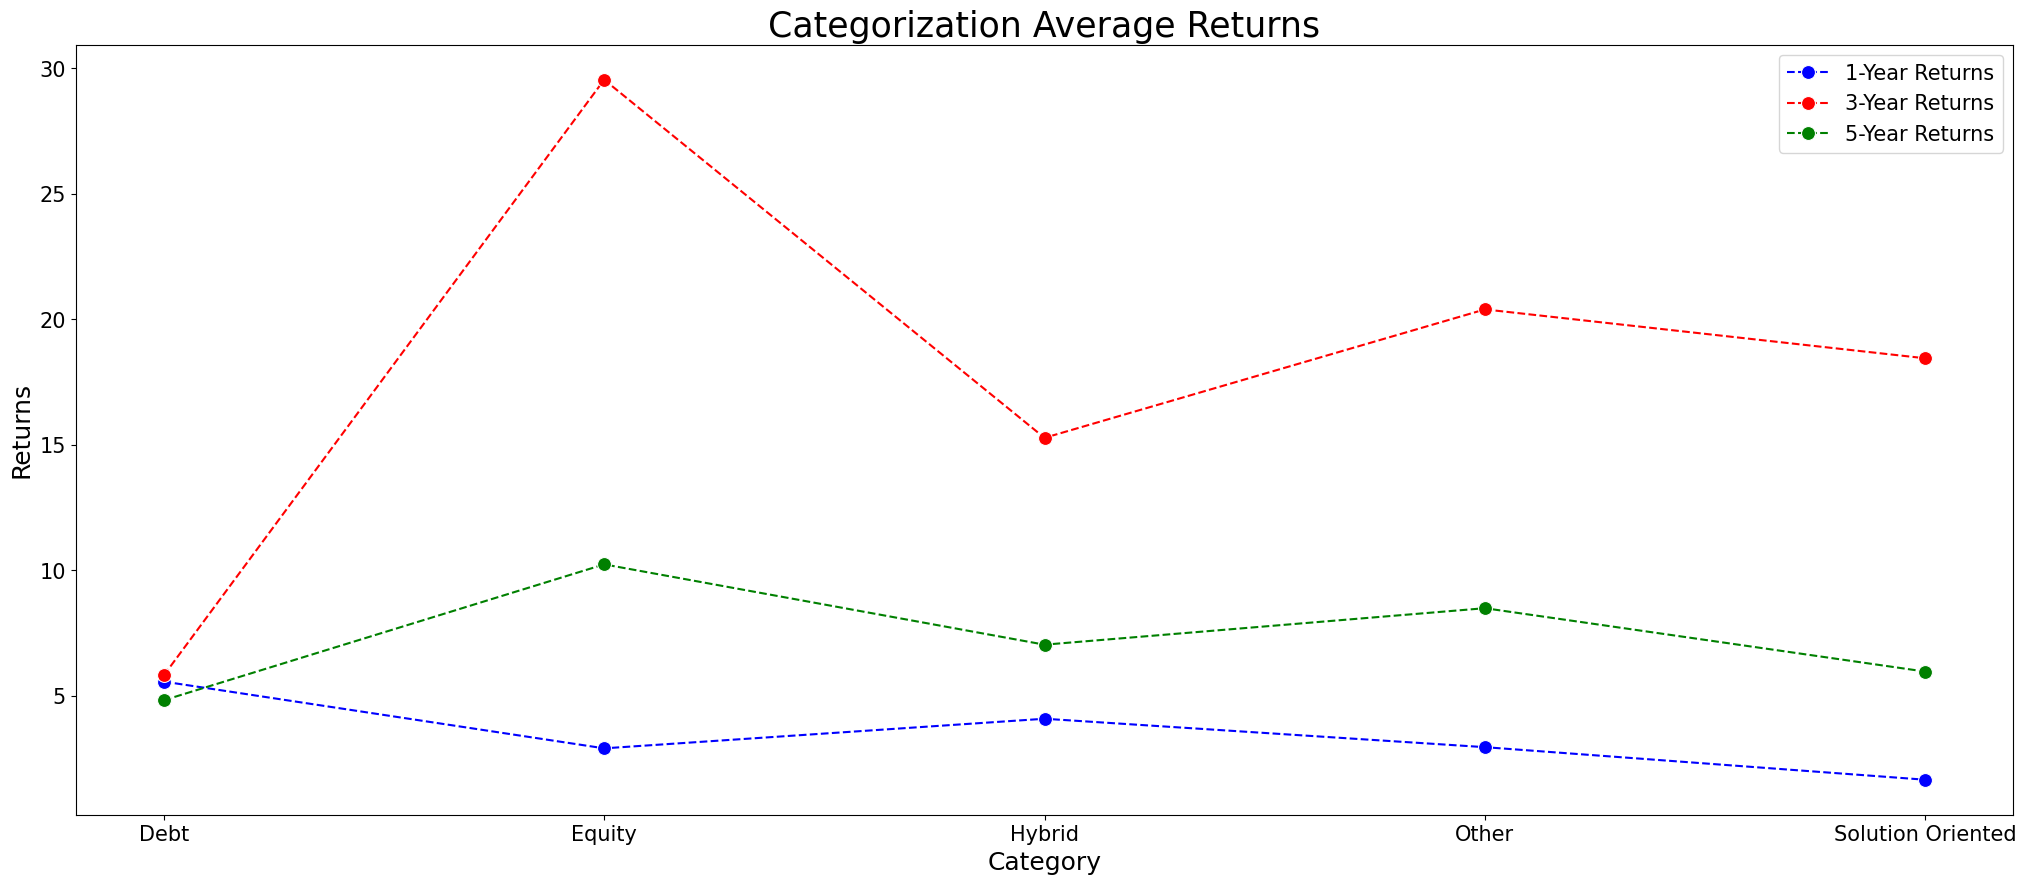

In [ ]:
# Plotting Average returns based on categories

plt.figure(figsize=(25,10))
plt.title("Categorization Average Returns", fontsize=25)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Returns', fontsize=18)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)


sns.lineplot(x=Year_1.index,y=Year_1.values,label='1-Year Returns', color='b', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=Year_3.index,y=Year_3.values,label='3-Year Returns', color='red', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=Year_5.index,y=Year_5.values,label='5-Year Returns', color='g', marker='o', linestyle='--', markersize=10)


plt.legend(fontsize=15)

**Analysis**



1.   For 5 years all the funds give gooed return, equity fund would be more profitable
2.   For 3 Years the funds show great return, apart from debt fund all other are much profitable
3.   For 1 Year investing in debt fund would be more profitable.



In [ ]:
# Fund return based on sub-category
year_1 = df.groupby('Sub_Category')['Returns_1Yr'].mean()
year_3 = df.groupby('Sub_Category')['Returns_3Yr'].mean()
year_5 = df.groupby('Sub_Category')['Returns_5Yr'].mean()

In [ ]:
year_1

Sub_Category
Aggressive Hybrid Mutual Funds                     2.450000
Arbitrage Mutual Funds                             5.363636
Banking and PSU Mutual Funds                       4.257143
Childrens Funds                                    0.462500
Conservative Hybrid Mutual Funds                   5.247059
Contra Funds                                       8.366667
Corporate Bond Mutual Funds                        4.022222
Credit Risk Funds                                 14.421429
Dividend Yield Funds                               4.133333
Dynamic Asset Allocation or Balanced Advantage     4.342105
Dynamic Bond                                       4.727273
ELSS Mutual Funds                                  1.400000
Equity Savings Mutual Funds                        3.561905
Fixed Maturity Plans                               7.900000
Flexi Cap Funds                                    0.286364
Floater Mutual Funds                               5.318182
FoFs Domestic              

In [ ]:
year_3

Sub_Category
Aggressive Hybrid Mutual Funds                    23.223333
Arbitrage Mutual Funds                             4.418182
Banking and PSU Mutual Funds                       5.228571
Childrens Funds                                   20.650000
Conservative Hybrid Mutual Funds                  11.511765
Contra Funds                                      33.566667
Corporate Bond Mutual Funds                        7.594444
Credit Risk Funds                                  8.328571
Dividend Yield Funds                              30.700000
Dynamic Asset Allocation or Balanced Advantage    16.036842
Dynamic Bond                                       7.045455
ELSS Mutual Funds                                 28.609524
Equity Savings Mutual Funds                       14.147619
Fixed Maturity Plans                              10.350000
Flexi Cap Funds                                   26.363636
Floater Mutual Funds                               4.118182
FoFs Domestic              

In [ ]:
year_5

Sub_Category
Aggressive Hybrid Mutual Funds                     9.126667
Arbitrage Mutual Funds                             4.036364
Banking and PSU Mutual Funds                       5.300000
Childrens Funds                                    8.512500
Conservative Hybrid Mutual Funds                   7.341176
Contra Funds                                      14.033333
Corporate Bond Mutual Funds                        5.327778
Credit Risk Funds                                  4.785714
Dividend Yield Funds                               9.933333
Dynamic Asset Allocation or Balanced Advantage     6.373684
Dynamic Bond                                       6.245455
ELSS Mutual Funds                                 10.559524
Equity Savings Mutual Funds                        5.771429
Fixed Maturity Plans                               7.000000
Flexi Cap Funds                                   10.363636
Floater Mutual Funds                               3.109091
FoFs Domestic              

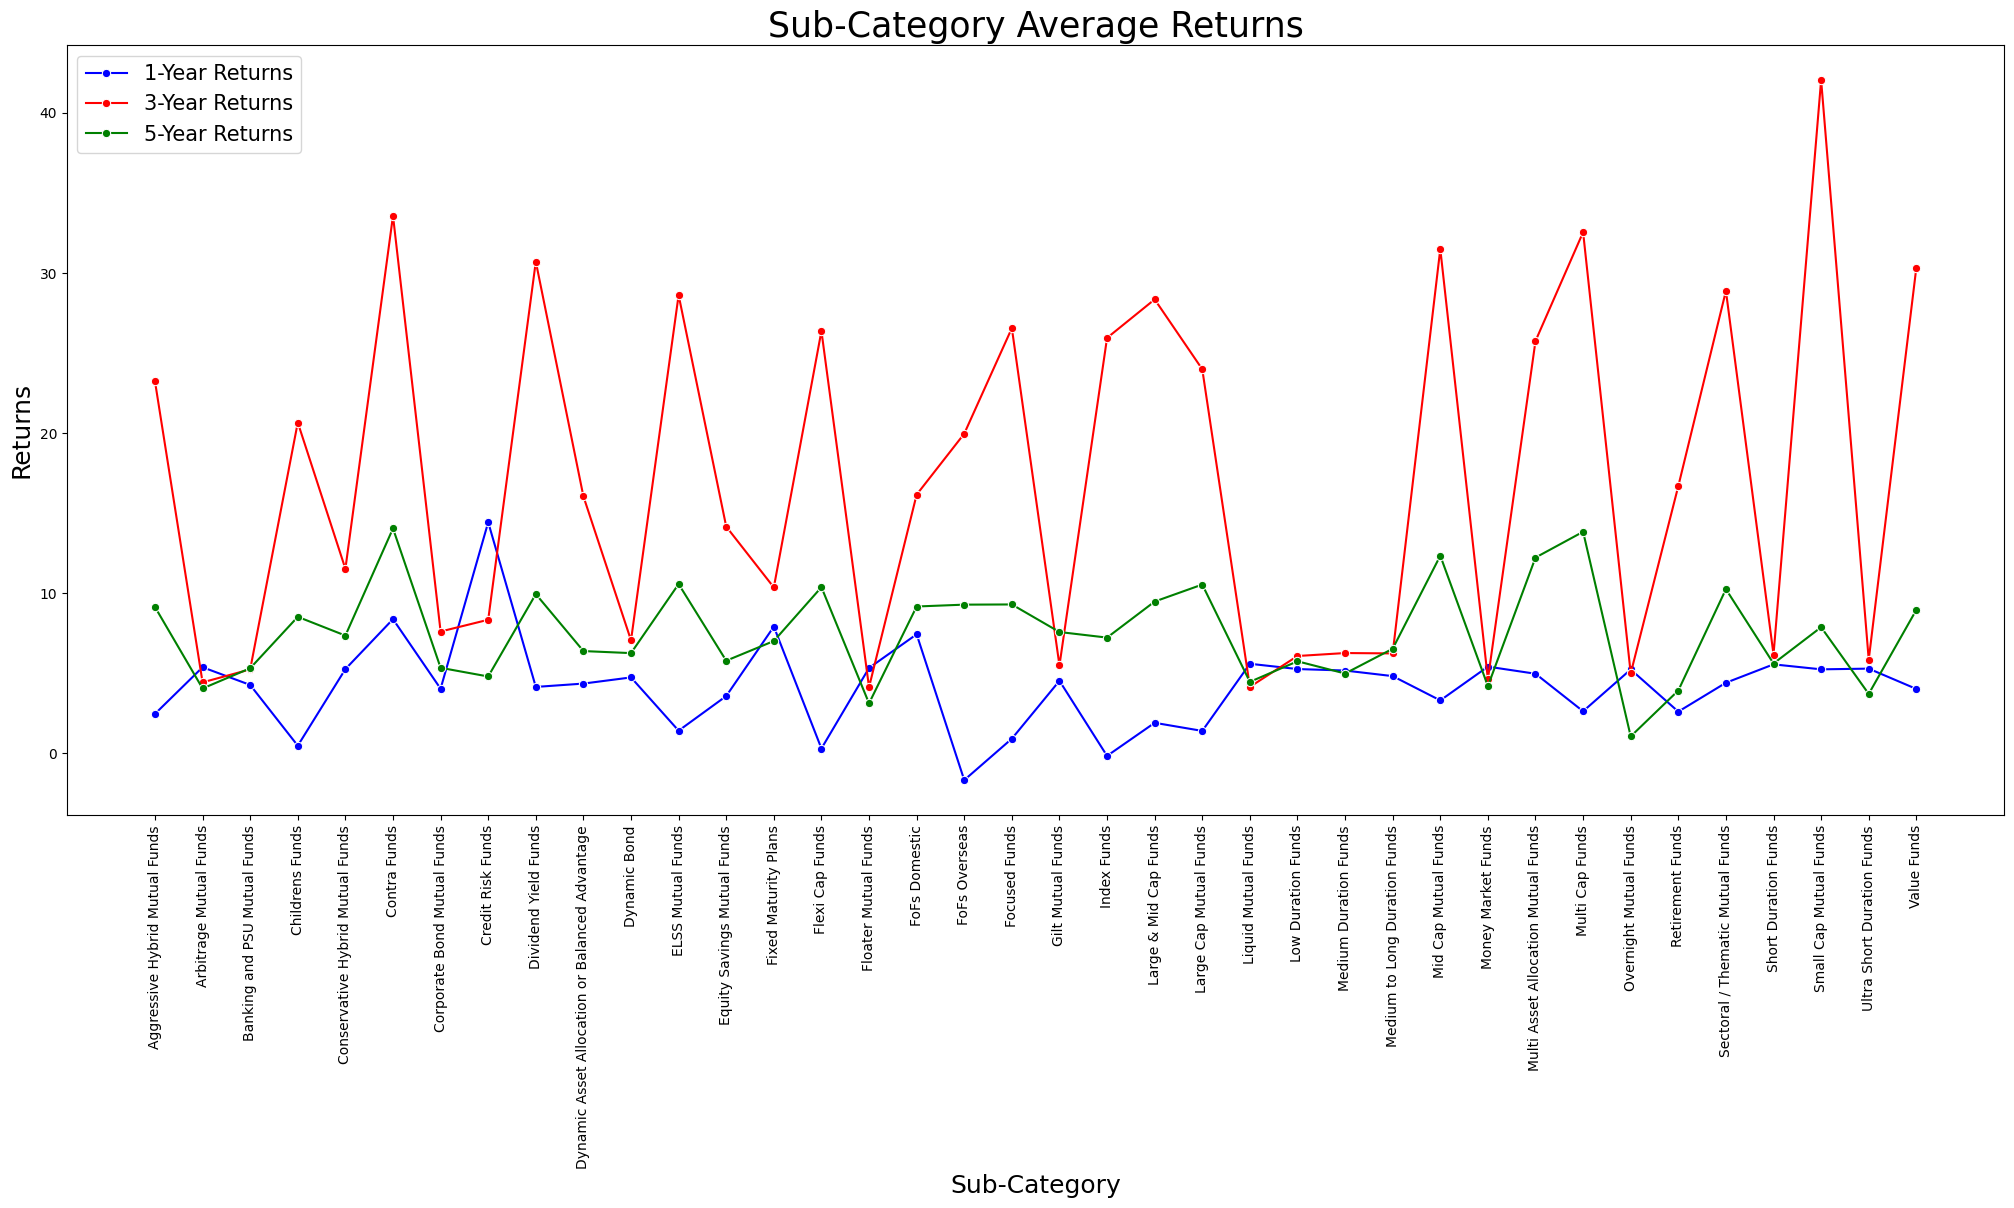

In [ ]:
# Plotting Average returns based on sub-categories

plt.figure(figsize=(25,10))
plt.title("Sub-Category Average Returns", fontsize=25)
plt.xlabel('Sub-Category', fontsize=18)
plt.ylabel('Returns', fontsize=18)
plt.xticks(rotation=90)


sns.lineplot(x=year_1.index,y=year_1.values,label='1-Year Returns', color='b', marker='o')
sns.lineplot(x=year_3.index,y=year_3.values,label='3-Year Returns', color='red', marker='o')
sns.lineplot(x=year_5.index,y=year_5.values,label='5-Year Returns', color='g', marker='o')


plt.legend(fontsize=15)

**Analysis**


1.   For 1Year, Credit Risk Fund have the greater return and FoFs Overseas has the lowest / non-profitable return.
2.   For 3Year, Small Cap mutual fund has the highest return and Floater Mutual Fund has the lowest but still gives profitable return.
3.   For 5Year, Contra and Multi Cap Funds shows good return, lowest return is of Overnight Funds.

**Overall Analysis based on Category and sbu-category**

*Investing for period of 3 Year gives greater return*



In [ ]:
#checking for low returns or worst returns
year_1_min = df.groupby('Category')['Returns_1Yr'].min()
year_3_min = df.groupby('Category')['Returns_3Yr'].min()
year_5_min = df.groupby('Category')['Returns_5Yr'].min()

In [ ]:
year_1_min

Category
Debt                  1.6
Equity              -19.7
Hybrid               -5.7
Other               -12.1
Solution Oriented    -6.5
Name: Returns_1Yr, dtype: float64

<Axes: title={'center': 'Category Average Returns'}, xlabel='Category', ylabel='Returns'>

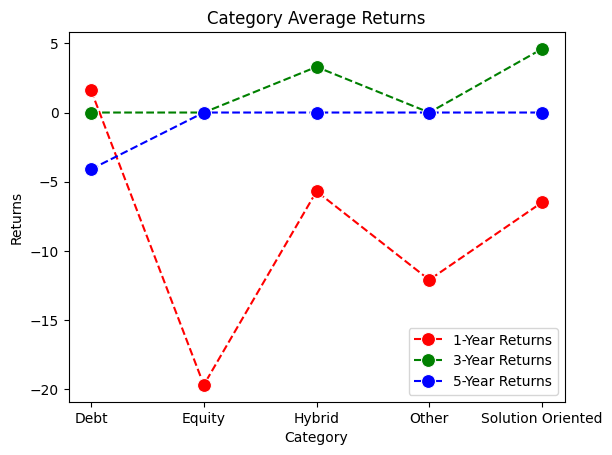

In [ ]:
# Plotting Average returns based on categories for low / worst returns

#plt.figure(figsize=(20,10))
plt.title("Category Average Returns")
plt.xlabel('Category', fontsize=10)
plt.ylabel('Returns', fontsize=10)



sns.lineplot(x=year_1_min.index,y=year_1_min.values,label='1-Year Returns', color='red', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=year_3_min.index,y=year_3_min.values,label='3-Year Returns', color='g', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=year_5_min.index,y=year_5_min.values,label='5-Year Returns', color='b', marker='o', linestyle='--', markersize=10)


In [ ]:
Year_1_min = df.groupby('Sub_Category')['Returns_1Yr'].min()
Year_3_min = df.groupby('Sub_Category')['Returns_3Yr'].min()
Year_5_min = df.groupby('Sub_Category')['Returns_5Yr'].min()

In [ ]:
Year_1_min

Sub_Category
Aggressive Hybrid Mutual Funds                    -5.7
Arbitrage Mutual Funds                             3.9
Banking and PSU Mutual Funds                       2.2
Childrens Funds                                   -6.5
Conservative Hybrid Mutual Funds                   1.8
Contra Funds                                       2.8
Corporate Bond Mutual Funds                        1.7
Credit Risk Funds                                  1.6
Dividend Yield Funds                              -1.5
Dynamic Asset Allocation or Balanced Advantage    -0.7
Dynamic Bond                                       1.7
ELSS Mutual Funds                                -11.1
Equity Savings Mutual Funds                        0.8
Fixed Maturity Plans                               4.4
Flexi Cap Funds                                   -9.0
Floater Mutual Funds                               4.4
FoFs Domestic                                     -5.8
FoFs Overseas                                    -12

In [ ]:
Year_3_min

Sub_Category
Aggressive Hybrid Mutual Funds                    15.1
Arbitrage Mutual Funds                             3.3
Banking and PSU Mutual Funds                       0.0
Childrens Funds                                   15.2
Conservative Hybrid Mutual Funds                   8.1
Contra Funds                                      27.6
Corporate Bond Mutual Funds                        0.0
Credit Risk Funds                                  5.7
Dividend Yield Funds                              25.2
Dynamic Asset Allocation or Balanced Advantage     9.9
Dynamic Bond                                       0.0
ELSS Mutual Funds                                 15.7
Equity Savings Mutual Funds                        9.6
Fixed Maturity Plans                               6.2
Flexi Cap Funds                                   16.4
Floater Mutual Funds                               0.0
FoFs Domestic                                      0.0
FoFs Overseas                                      9

In [ ]:
Year_5_min

Sub_Category
Aggressive Hybrid Mutual Funds                     0.0
Arbitrage Mutual Funds                             0.0
Banking and PSU Mutual Funds                       0.0
Childrens Funds                                    0.0
Conservative Hybrid Mutual Funds                   3.4
Contra Funds                                      12.3
Corporate Bond Mutual Funds                        0.0
Credit Risk Funds                                 -4.1
Dividend Yield Funds                               0.0
Dynamic Asset Allocation or Balanced Advantage     0.0
Dynamic Bond                                       0.0
ELSS Mutual Funds                                  0.0
Equity Savings Mutual Funds                        0.0
Fixed Maturity Plans                               0.0
Flexi Cap Funds                                    0.0
Floater Mutual Funds                               0.0
FoFs Domestic                                      0.0
FoFs Overseas                                      0

<Axes: title={'center': 'Sub-Category Average Returns'}, xlabel='sub-Category', ylabel='Returns'>

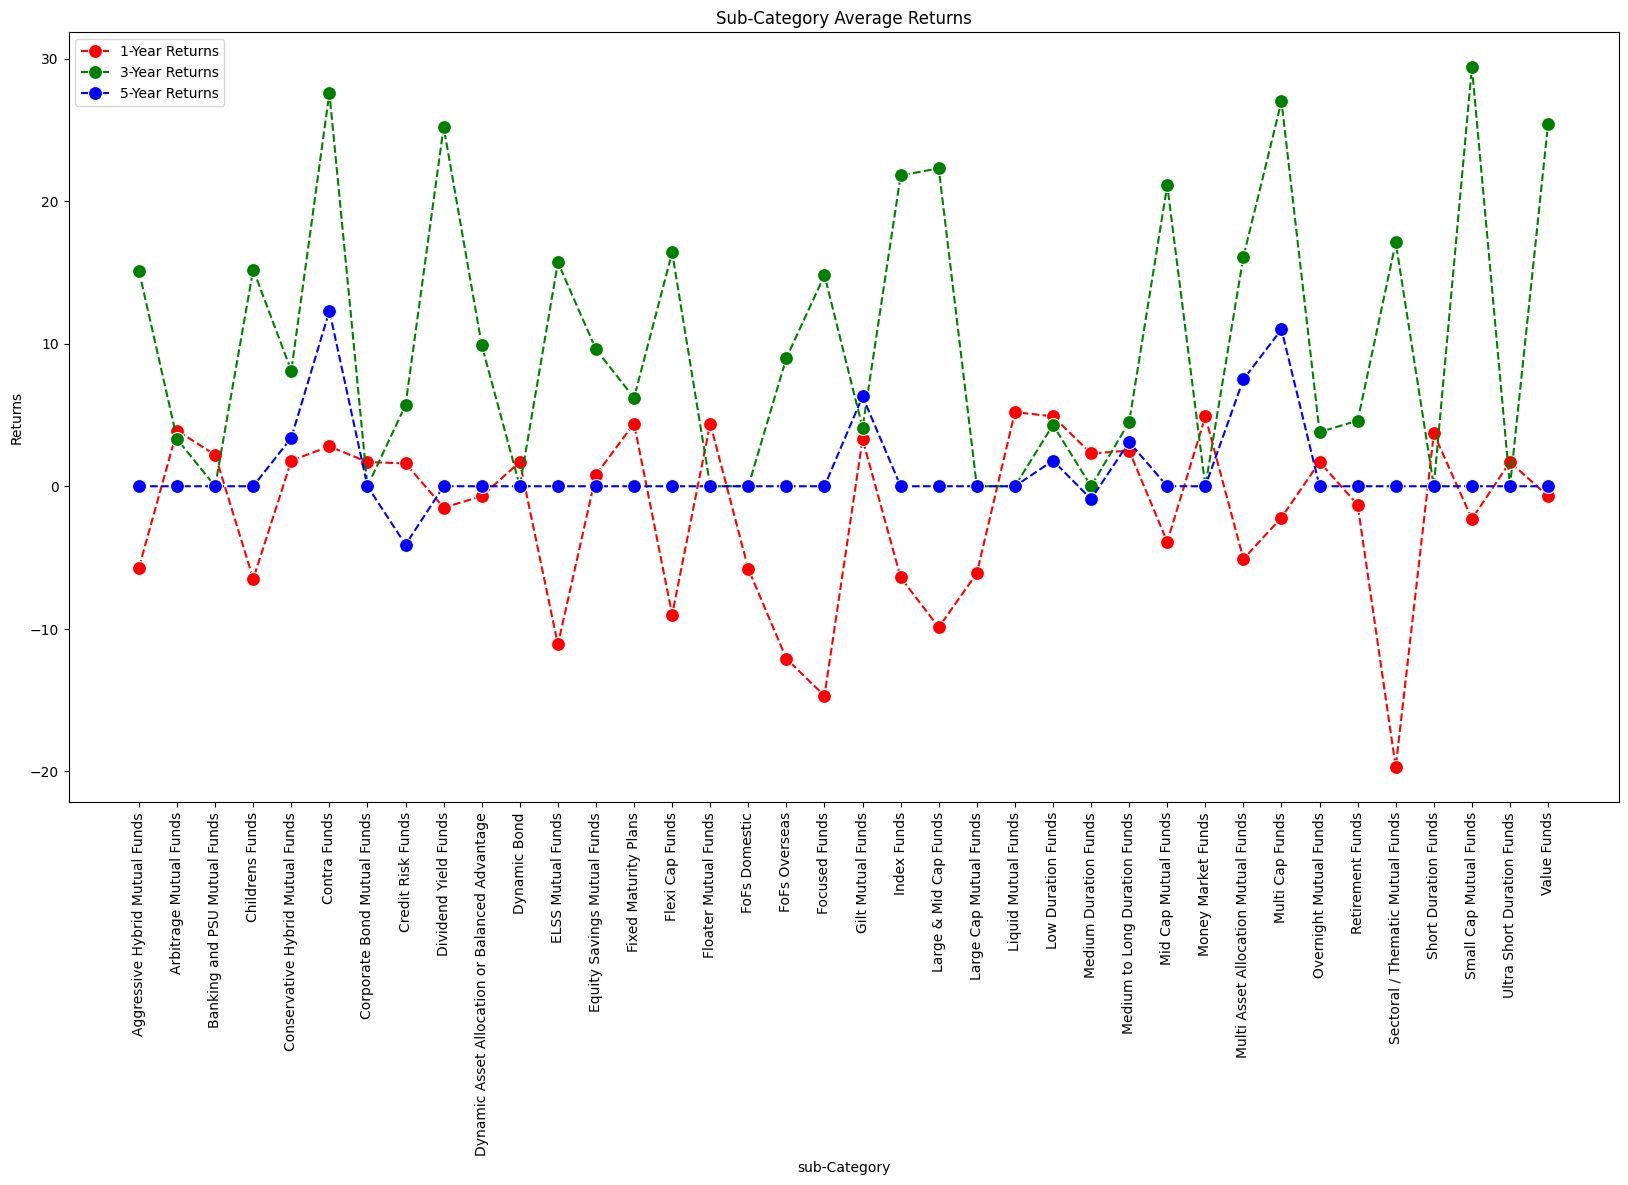

In [ ]:
# Plotting Average returns based on sub-categories for low / worst returns

plt.figure(figsize=(20,10))
plt.title("Sub-Category Average Returns")
plt.xlabel('sub-Category', fontsize=10)
plt.ylabel('Returns', fontsize=10)
plt.xticks(rotation=90)


sns.lineplot(x=Year_1_min.index,y=Year_1_min.values,label='1-Year Returns', color='red', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=Year_3_min.index,y=Year_3_min.values,label='3-Year Returns', color='g', marker='o', linestyle='--', markersize=10)
sns.lineplot(x=Year_5_min.index,y=Year_5_min.values,label='5-Year Returns', color='b', marker='o', linestyle='--', markersize=10)